# Load data into tplot variables

In [16]:
import pyspedas, pytplot
import numpy as np
from pyspedas.mth5.load_fdsn import load_fdsn

date_start = '2015-06-22T01:45:00'
date_end = '2015-06-22T02:20:00'
stations = ['ALW49', 'GAW50', 'REU49', 'TNV48', 'REP47', 'REQ48', 'TNU48']
fdsn_vars = []
for sta in stations:
   load_fdsn(network="4P", station=sta, trange=[date_start, date_end], nodownload=True, noexception=True)
   fdsn_vars.append(f"fdsn_4P_{sta}_y")

pyspedas.themis.gmag(sites='frd', trange=[date_start, date_end], time_clip=True)

2023-12-07T21:39:27.508458-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_ALW49_20150622T014500_20150622T022000.h5
2023-12-07T21:39:28.853815-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAW50_20150622T014500_20150622T022000.h5
2023-12-07T21:39:30.782828-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REU49_20150622T014500_20150622T022000.h5
2023-12-07T21:39:32.376849-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNV48_20150622T014500_20150622T022000.h5
2023-12-07T21:39:33.528247-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REP47_20150622T014500_20150622T022000.h5
2023-12-07T21:39:35.038107-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REQ48_20150622T014500_20150622T022000.h5
2023-12-07T21:39:35.044112-0800 | WARNING | mth5.mth5 | open_mth

07-Dec-23 21:39:37: Cannot initialize mth5 object
07-Dec-23 21:39:37: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/frd/2015/
07-Dec-23 21:39:37: File is current: c:\work\Data\SPEDAS\themis\thg/l2/mag/frd/2015/thg_l2_mag_frd_20150622_v01.cdf
07-Dec-23 21:39:38: Time clip was applied to: thg_mag_frd


['thg_mag_frd']

# Process and visualize data

07-Dec-23 21:59:58: fdsn_4P_TNU48_y is currently not in pytplot.
07-Dec-23 21:59:58: The name fdsn_4P_TNU48_y is currently not in pytplot
07-Dec-23 21:59:58: The name fdsn_4P_TNU48_y is currently not in pytplot
07-Dec-23 21:59:58: Variable not found: fdsn_4P_TNU48_y


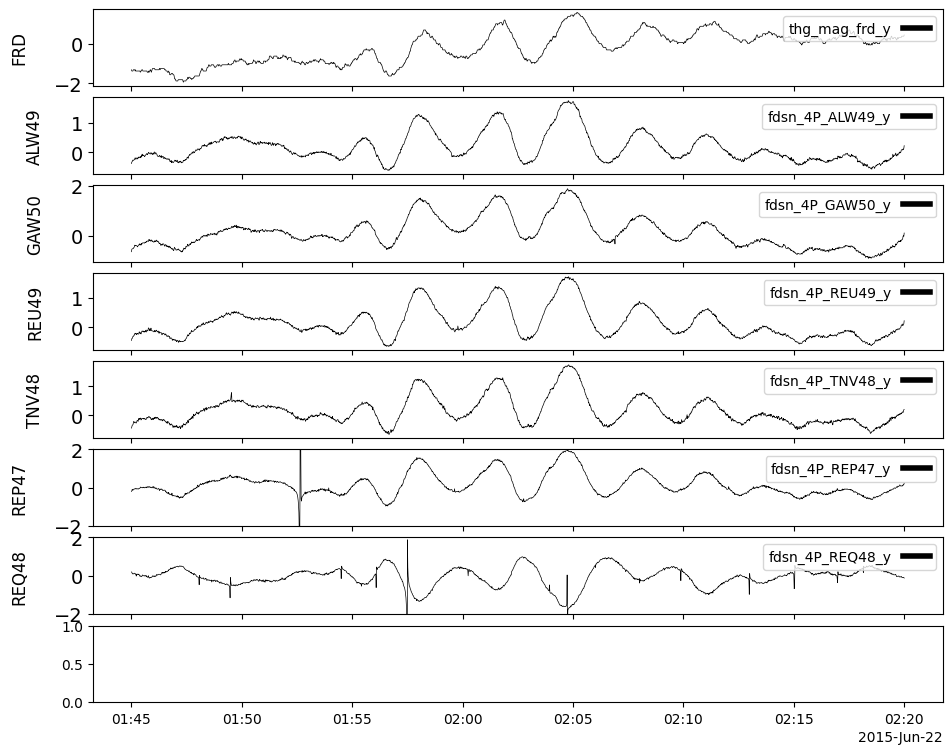

In [43]:
tplot_vars = ['thg_mag_frd_y'] + fdsn_vars 

for var in tplot_vars:   
   if pytplot.tnames(var[:-2]):
      pytplot.split_vec(var[:-2])
      time, by = pytplot.get_data(var)  # Unpack tplot variable
      by -= np.median(by)  # Subtract median   
   pytplot.options(var, opt_dict={"legend_names": [var], "ytitle": var.split("_")[2].upper()}) 

# Pytplot options for outliers
pytplot.options('fdsn_4P_REQ48_y', 'yrange', [-2, 2])
pytplot.options('fdsn_4P_REP47_y', 'yrange', [-2, 2])
   
# Global tplot options
pytplot.tplot_options('vertical_spacing', 0.15)
pytplot.tplot_options('axis_font_size', 14)
   
pytplot.tplot(tplot_vars, xsize=10, ysize=9)